In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Métodos numéricos

Cuando trabajamos con métodos numéricos en la resolución de ecuaciones diferenciales, el objetivo es encontrar un conjunto de valores que se aproximen una solución particular de la ecuación diferencial propuesta.

Existen diferentes algoritmos que permiten implementar estos métodos numéricos, algunos más certeros que otros, y por tanto es posible (en ocasiones) estimar el error y decidir qué método emplear en cada etapa de la busqueda de una buena aproximación de la solución.

Los métodos que se abordarán en esta parte del curso, corresponden a métodos para aproximar soluciones al problema de valores iniciales:

$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$


## Método de Euler

Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$
el algoritmo asociado al método de Euler está dado por:

Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}= y_i +h f(x_i , y_i) $ <br>
    
Fin

## Ejemplo 1

Considere el problema de valores iniciales 
$$ y^2 dy - \sqrt{3} x dx = 0 \quad ; \quad y(1)=2,$$
* a) Utilice el método de Euler para encontrar una aproximación de $y(4)$ para el problema de valores iniciales utilizando $h=0,1$.
* b) La solución al PVI está dada por $y=\sqrt[3]{\frac{3\sqrt{3}}{2}x^2+8-\frac{3\sqrt{2}}{2}}$ (verifíquela en otra ocasión). En un mismo gráfico trace la solución aproximada y la solución explícita al PVI.

* c) Calcule el error absoluto al problema.
* d) Con los datos recabados concluya si es una buena aproximación.

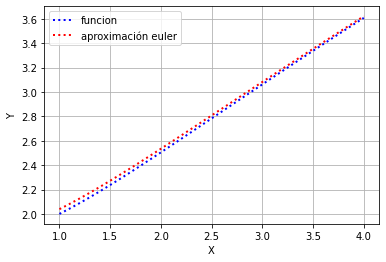


El error del problema:  0.013491956332012833


In [3]:
# a) encontrar la aproximación utilizando Euler
x = np.linspace(1, 4, 31)
y = np.linspace(1, 4, 31)
y[0] = 2
h = 0.1

for i in range(30):
    y[i+1] = y[i] + h * (np.sqrt(3) * x[i]) / (y[i]**2)
#   print(y[i+1])

# b) graficar la funcion solución y la aproximada
f = np.cbrt((3 * np.sqrt(3) / 2) * x**2 + 8 - (np.sqrt(2) * 3) / 2)

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y,linewidth=2, linestyle=':', color= "blue", label= "funcion")
plt.plot(x, f, linewidth=2, linestyle=':', color= "red", label= "aproximación euler")
plt.grid()
plt.legend()
plt.show()

# C) calcular error, la diferencia en el último punto obtenido por euler y la función
error = np.abs(y[-1] - f[-1])
print("\nEl error del problema: ", error)

# D) observando los gráficos se puede decir que es una buena aproximación
    

## Ejemplo 2

* a) Defina una función en Python que permita encontrar una aproximación de $y(x_n)$ para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice la función anterior para encontrar una aproximación de $y(0,5)$ al PVI

$$ y'(x)=2xy^2 \quad , \quad y(0)=1$$ para ello utilice 
$h=0,1$ y $h=0,01$

(-3.0, 3.0)

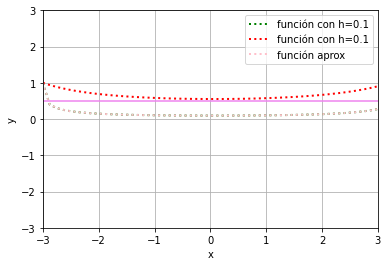

In [93]:
def f(x, y): return 2*x*y**2

def euler(f, x0, xn, y0, h):
    x = np.linspace(-3, 3, 51)
    y = np.linspace(-3, 3, 51)
    y[0] = y0
    j = 0
    for i in range(len(y) -1):
        y[i+1] = y[i] + h * f(x[i],y[i])
        
    return y

def aproximacion(f, x0, xn, y0, h):
    aprox = euler(f, x0, xn, y0, h)
    if x0 <= xn:
        aproximacion(f, h + x0, xn, np.mean(y0), h)    
    return aprox
        

x = np.linspace(-3, 3, 51)
n = euler(f, 0, 0.5, 1, 0.1)
plt.plot(x, n, color="green", linewidth=2, linestyle=":", label="función con h=0.1")
    
c =euler(f, 0, 0.5, 1, 0.01)
plt.plot(x, c, color="red", linewidth=2, linestyle=":", label="función con h=0.1")

u = aproximacion(f, 0, 0.5, 1, 0.1)
plt.plot(x, u, color="pink", linewidth=2, linestyle=":", label="función aprox")

valor = np.linspace(0.5, 0.5, 51)
plt.plot(x, valor, color="violet")

# hacer gráfico
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-3, 3])
plt.ylim([-3, 3])




En adición, si se desea utilizar las aproximaciones para confeccionar un gráfico, es posible utilizar un diccionario.

## Ejercicios adicionales

* a) Considere el PVI
$$ y'(t) = \frac{y}{t} - \left( \frac{y}{t} \right)^2 \quad ; \quad y(1)=1 $$
encuentre una aproximación de $y(5)$ vía método de Euler, considerando
    + $h=1$ 
    + $h=0,5$
    
* b) Verifique que $y(t) = \dfrac{1}{1+\ln|t|}$ es solución al PVI propuesto.
* c) Grafique las aproximaciones de la solución y la solución explícita al problema en un mismo gráfico. Personalice el gráfico y las curvas a su elección. Intuitivamente ¿es una buena aproximación al problema?
* d) Calcule el error absoluto.
* e) Elabore un algoritmo que permita calcular el error global de sus aproximaciones.

C:\Users\arace\AppData\Local\Temp\ipykernel_2012\3818414755.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  def f1(t, y): return (y/t) - (y/t)**2
C:\Users\arace\AppData\Local\Temp\ipykernel_2012\3818414755.py:2: RuntimeWarning: invalid value encountered in double_scalars
  def f1(t, y): return (y/t) - (y/t)**2
C:\Users\arace\AppData\Local\Temp\ipykernel_2012\3818414755.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  def f1(t, y): return (y/t) - (y/t)**2
C:\Users\arace\AppData\Local\Temp\ipykernel_2012\3818414755.py:2: RuntimeWarning: invalid value encountered in double_scalars
  def f1(t, y): return (y/t) - (y/t)**2
C:\Users\arace\AppData\Local\Temp\ipykernel_2012\3818414755.py:11: RuntimeWarning: divide by zero encountered in log
  f = t/(1+ np.log(t))
C:\Users\arace\AppData\Local\Temp\ipykernel_2012\3818414755.py:11: RuntimeWarning: invalid value encountered in log
  f = t/(1+ np.log(t))


Text(0.5, 1.0, 'Gráfico')

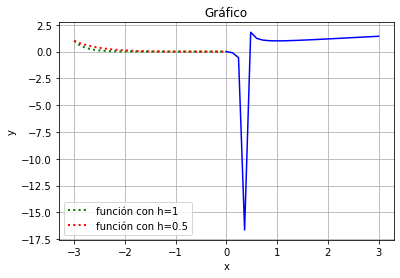

In [101]:
# c)
def f1(t, y): return (y/t) - (y/t)**2

t = np.linspace(-3, 3, 51)
n = euler(f1, 1, 5, 1, 1)
plt.plot(t, n, color="green", linewidth=2, linestyle=":", label="función con h=1")

c =euler(f1, 1, 5, 1, 0.5)
plt.plot(t, c, color="red", linewidth=2, linestyle=":", label="función con h=0.5")

f = t/(1+ np.log(t))
plt.plot(t, f, color="blue")


'''
for i in range(30):
    y1[i+1] = y1[i] + h2 * ((y1[i] / t[i]) - (y1[i] / t[i])**2)
    
plt.plot(t, y1, color="blue", linewidth=3, linestyle=":", label="función h =0.5")




# b) La solución tiene un t en el numerador en vez de 1

# c) grafico solución y aproximaciones
f = t / (np.log(t) + 1)
plt.plot(t, f, color="green", linewidth=3, linestyle="-", label="función solución")

plt.xlim([-5, 5])
plt.ylim([-5, 5])

# Los gráficos no chocan, no me parece buena aproximación
print("f:\n", f)
print("y:\n", y)
print("y1:\n", y1)
# d) error

'''

# formato del gráfico
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico")